# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [114]:
# Dependencies and Setup
# %matplotlib qt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# import requests
import grequests
import time
from scipy.stats import linregress
import traceback
import json
import os
import mplcursors
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [115]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [116]:
# Set the API base URL https://api.weatherstack.com/current? access_key = YOUR_ACCESS_KEY   & query = New York
# https://api.openweathermap.org/data/2.5/weather?q=London&appid={API key}

baseUrl = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
# cities_test = cities[:80] # test with 80 cities while developing the code
uList = [baseUrl + c + "&units=metric&appid=" + weather_api_key for c in cities ]

# Loop through all the cities in our list to fetch weather data
allRes = (grequests.get(url) for url in uList)
responses = grequests.map(allRes)
record_number = 0
for i, res in enumerate(responses):
    resDict = json.loads(res.text)
    try:
        workingCity = resDict['name']
        city_lat = resDict['coord']['lat']
        city_lng = resDict['coord']['lon']
        city_max_temp = resDict['main']['temp_max']
        city_humidity = resDict['main']['humidity']
        city_clouds = resDict['clouds']['all']
        city_wind = resDict['wind']['speed']
        city_country = resDict['sys']['country']
        city_date = resDict['dt']
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    except:
        workingCity = cities[i]
        print(f"City {cities[i]} not found, skipping it")
        continue
    # Group cities in sets of 50 for logging purposes
    if (record_number % 50 == 0 and record_number >= 50):
        set_count += 1
        record_number = 0
    record_number +=1
    print("Processing Record %s of Set %s | %s" % (record_number, set_count, workingCity))
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | Saint-Pierre
Processing Record 2 of Set 1 | Avarua
Processing Record 3 of Set 1 | Hobart
Processing Record 4 of Set 1 | Honiara
Processing Record 5 of Set 1 | Hervey Bay
Processing Record 6 of Set 1 | Adrar
Processing Record 7 of Set 1 | Ushuaia
Processing Record 8 of Set 1 | Norman Wells
Processing Record 9 of Set 1 | Tasiilaq
Processing Record 10 of Set 1 | Vaini
Processing Record 11 of Set 1 | Vilhena
Processing Record 12 of Set 1 | Waipawa
Processing Record 13 of Set 1 | Olafsvik
Processing Record 14 of Set 1 | Woodstock
Processing Record 15 of Set 1 | Fukuechō
Processing Record 16 of Set 1 | Goderich
Processing Record 17 of Set 1 | Kirakira
Processing Record 18 of Set 1 | Mar del Plata
City blonduos not found, skipping it
Processing Record 19 of Set 1 | The Valley
Processing Record 20 of Set 1 | Natal
Processing Record 21 of Set 1 | Thompson
Processing Record 22 of Set 1 | Cape Town
Processi

' \nMethod above uses grequests for asynchronous api call \nMethod below is what the the class suggested to use. \n'

In [117]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          73
Lat           73
Lng           73
Max Temp      73
Humidity      73
Cloudiness    73
Wind Speed    73
Country       73
Date          73
dtype: int64

c:\Users\Gus Bustillos\AppData\Local\Programs\Python\Python39\lib\site-packages\gevent\hub.py:161: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [118]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,fergus falls,-21.3393,55.4781,28.09,69,0,2.06,RE,1679284806
1,fergus falls,-21.2078,-159.7750,27.03,83,20,4.63,CK,1679284717
2,fergus falls,-42.8794,147.3294,16.70,49,75,6.17,AU,1679285299
3,fergus falls,-9.4333,159.9500,28.74,76,93,1.87,SB,1679285299
4,fergus falls,-25.2986,152.8535,28.70,64,38,5.68,AU,1679285299


c:\Users\Gus Bustillos\AppData\Local\Programs\Python\Python39\lib\site-packages\gevent\hub.py:161: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [119]:
# Export the City_Data into a csv
destPath = os.path.abspath(os.getcwd() + "/output_data/") # assign destination path
if not os.path.exists(destPath): # Check if destination location exists, else create it
    os.makedirs(destPath)

city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [120]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fergus falls,-21.3393,55.4781,28.09,69,0,2.06,RE,1679284806
1,fergus falls,-21.2078,-159.7750,27.03,83,20,4.63,CK,1679284717
2,fergus falls,-42.8794,147.3294,16.70,49,75,6.17,AU,1679285299
3,fergus falls,-9.4333,159.9500,28.74,76,93,1.87,SB,1679285299
4,fergus falls,-25.2986,152.8535,28.70,64,38,5.68,AU,1679285299


c:\Users\Gus Bustillos\AppData\Local\Programs\Python\Python39\lib\site-packages\gevent\hub.py:161: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

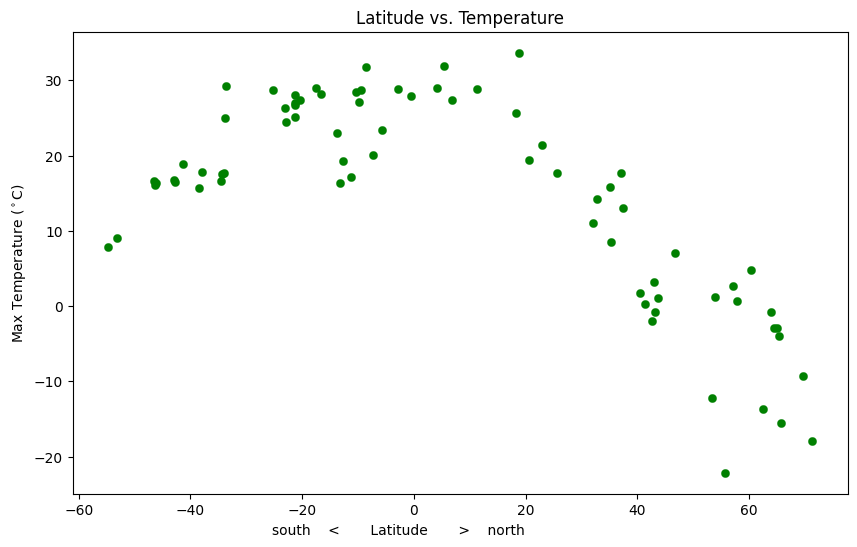

In [121]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.figure(figsize=(10,6))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'],linewidths = .2, color='g', marker ="o")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('south    <       Latitude       >    north                            ')
plt.ylabel('Max Temperature ($^\circ$C)')
plt.title('Latitude vs. Temperature')
# Save the figure
# plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

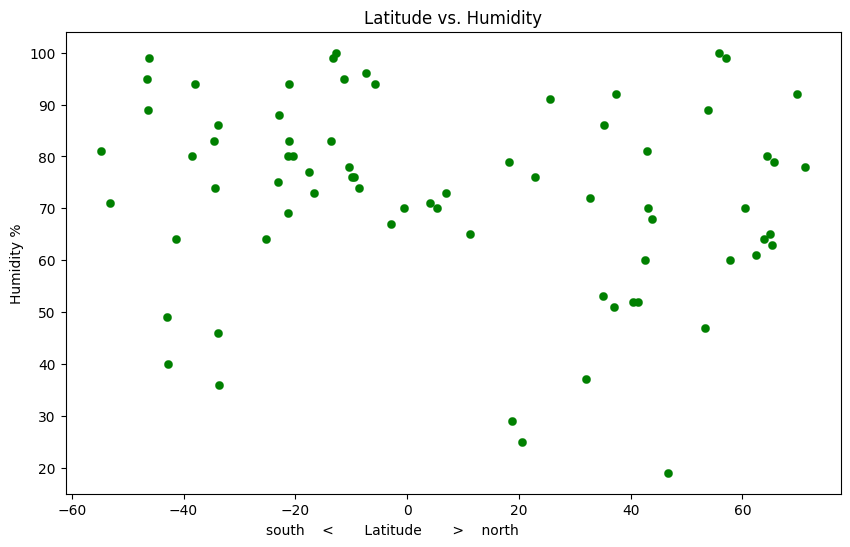

In [122]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
# fig = plt.figure()
plt.figure(figsize=(10,6))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'],linewidths = .2, color='g', marker ="o")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('south    <       Latitude       >    north                            ')
plt.ylabel('Humidity %')
plt.title('Latitude vs. Humidity')
# Save the figure
# plt.savefig("output_data/Fig2.png")
# Show plot
plt.show()

#### Latitude Vs. Cloudiness

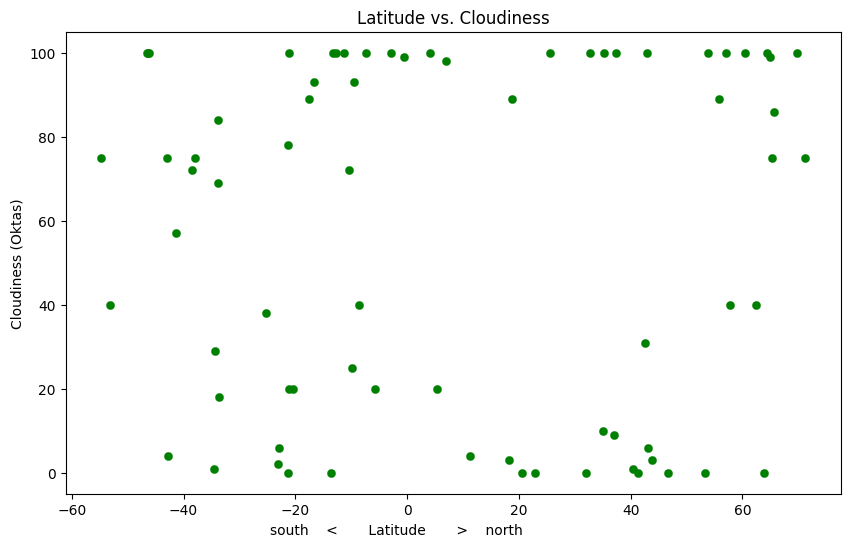

In [123]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.figure(figsize=(10,6))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'],linewidths = .2, color='g', marker ="o")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('south    <       Latitude       >    north                          ')
plt.ylabel('Cloudiness (Oktas)')
plt.title('Latitude vs. Cloudiness')

# Save the figure
# plt.savefig("output_data/Fig3.png")

# Show plot
# city_data_df
plt.show()

#### Latitude vs. Wind Speed Plot

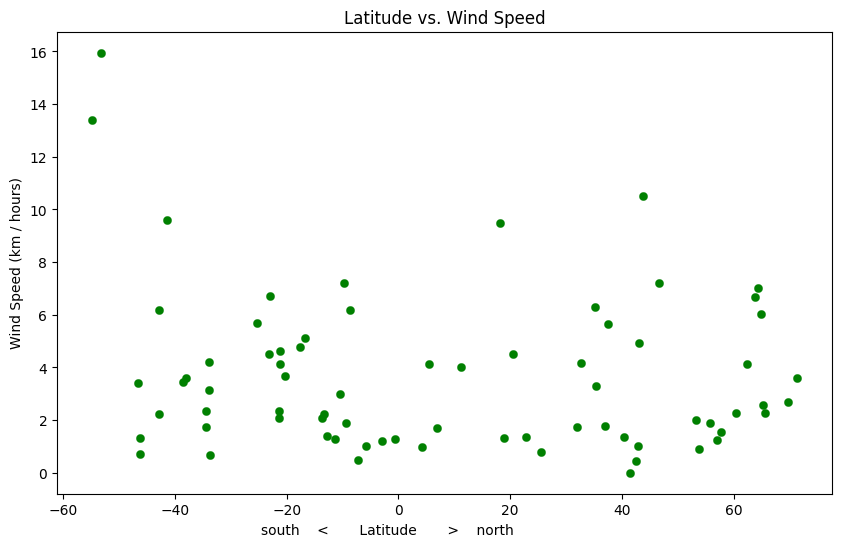

In [124]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.figure(figsize=(10,6))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'],linewidths = .2, color='g', marker ="o")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('south    <       Latitude       >    north                          ')
plt.ylabel('Wind Speed (km / hours)')
plt.title('Latitude vs. Wind Speed')
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()
# city_data_df

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [125]:
# Define a function to create Linear Regression plots
def linearRegressionPlot(df_x_axis, df_y_axis, xlable, ylabel, title):
    scipy_linear_model = linregress(df_x_axis, df_y_axis) # scipy_linear_model
    y_axiz = df_x_axis * scipy_linear_model[0] + scipy_linear_model[1]  # use slope and intercept from scipy_linear_model
    plt.scatter(df_x_axis, df_y_axis)
    plt.plot(df_x_axis, y_axiz ,color="g")
    plt.xlabel(xlable)
    plt.ylabel(ylabel)
    plt.title(title)
    return(plt)
# YOUR CODE HERE

In [126]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >  0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,fergus falls,20.5022,-10.0711,19.44,25,0,4.51,MR,1679285277
7,fergus falls,65.2820,-126.8329,-3.98,63,75,2.57,CA,1679284961
8,fergus falls,65.6145,-37.6368,-15.54,79,86,2.25,GL,1679284786
12,fergus falls,64.8945,-23.7142,-2.91,65,99,6.04,IS,1679285299
13,fergus falls,43.1334,-80.7497,-0.75,70,6,4.92,CA,1679285299


c:\Users\Gus Bustillos\AppData\Local\Programs\Python\Python39\lib\site-packages\gevent\hub.py:161: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [127]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <  0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fergus falls,-21.3393,55.4781,28.09,69,0,2.06,RE,1679284806
1,fergus falls,-21.2078,-159.7750,27.03,83,20,4.63,CK,1679284717
2,fergus falls,-42.8794,147.3294,16.70,49,75,6.17,AU,1679285299
3,fergus falls,-9.4333,159.9500,28.74,76,93,1.87,SB,1679285299
4,fergus falls,-25.2986,152.8535,28.70,64,38,5.68,AU,1679285299


c:\Users\Gus Bustillos\AppData\Local\Programs\Python\Python39\lib\site-packages\gevent\hub.py:161: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


###  Temperature vs. Latitude Linear Regression Plot

<module 'matplotlib.pyplot' from 'c:\\Users\\Gus Bustillos\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

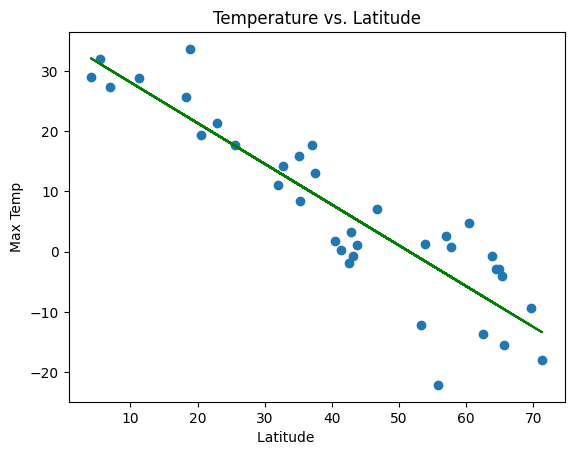

In [144]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
linearRegressionPlot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Max Temp', 'Temperature vs. Latitude')

<module 'matplotlib.pyplot' from 'c:\\Users\\Gus Bustillos\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

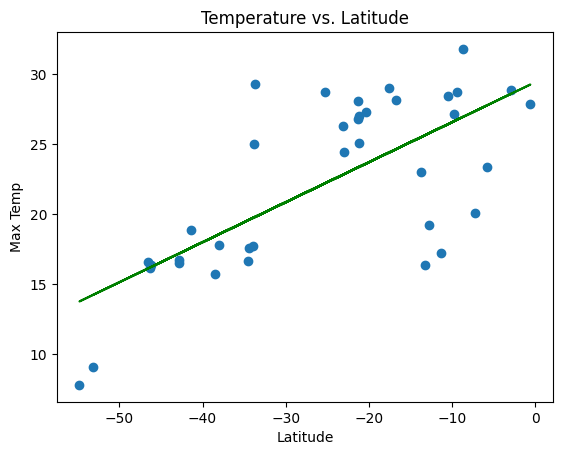

In [152]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
linearRegressionPlot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max Temp', 'Temperature vs. Latitude')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

<module 'matplotlib.pyplot' from 'c:\\Users\\Gus Bustillos\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

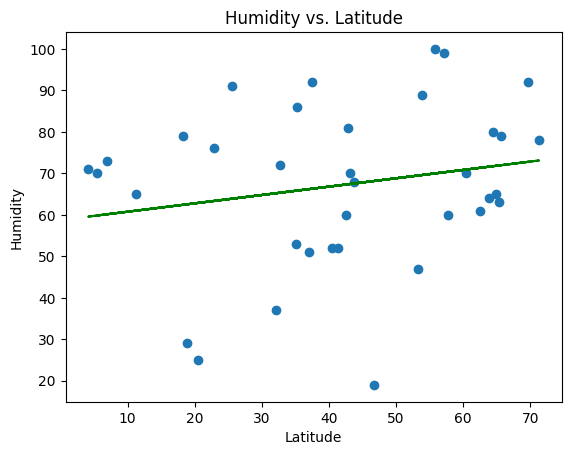

In [165]:
# Northern Hemisphere
# YOUR CODE HERE
linearRegressionPlot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity', 'Humidity vs. Latitude')

<module 'matplotlib.pyplot' from 'c:\\Users\\Gus Bustillos\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

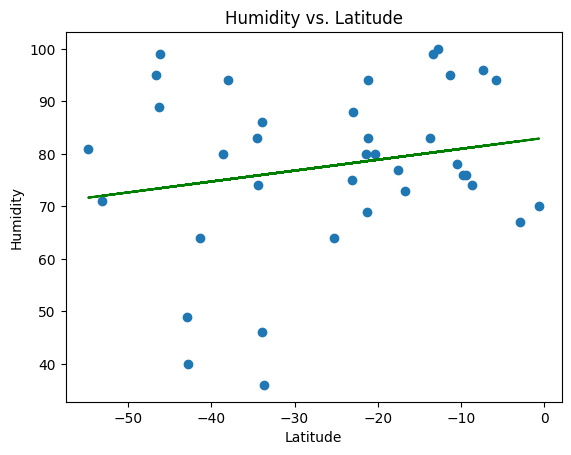

In [171]:
# Southern Hemisphere
# YOUR CODE HERE
linearRegressionPlot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity', 'Humidity vs. Latitude')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

<module 'matplotlib.pyplot' from 'c:\\Users\\Gus Bustillos\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

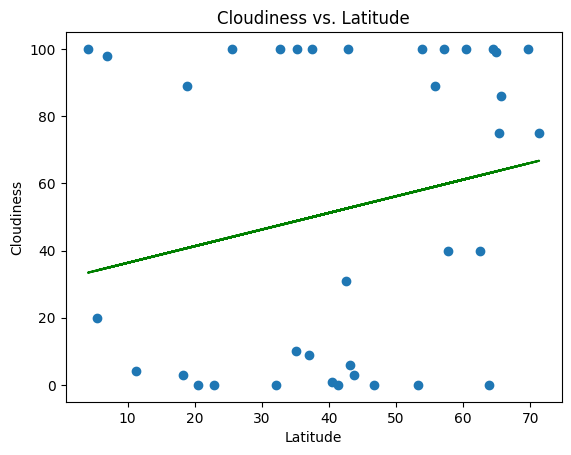

In [176]:
# Northern Hemisphere
# YOUR CODE HERE
linearRegressionPlot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', 'Cloudiness vs. Latitude')

<module 'matplotlib.pyplot' from 'c:\\Users\\Gus Bustillos\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

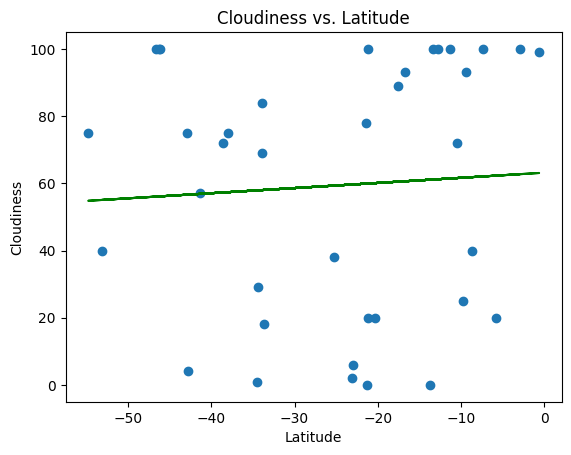

In [177]:
# Southern Hemisphere
# YOUR CODE HERE
linearRegressionPlot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', 'Cloudiness vs. Latitude')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

<module 'matplotlib.pyplot' from 'c:\\Users\\Gus Bustillos\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

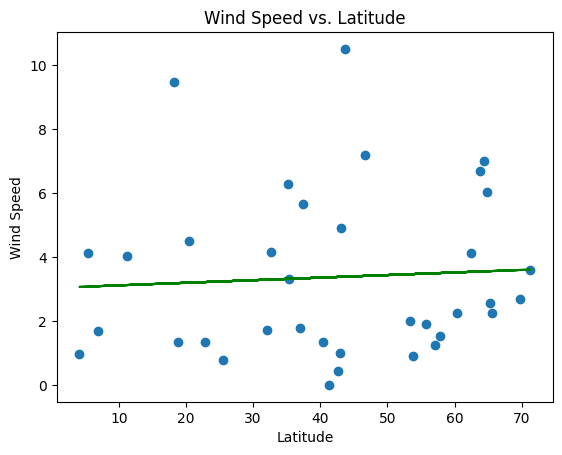

In [180]:
# Northern Hemisphere
# YOUR CODE HERE
linearRegressionPlot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', 'Wind Speed vs. Latitude')

<module 'matplotlib.pyplot' from 'c:\\Users\\Gus Bustillos\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

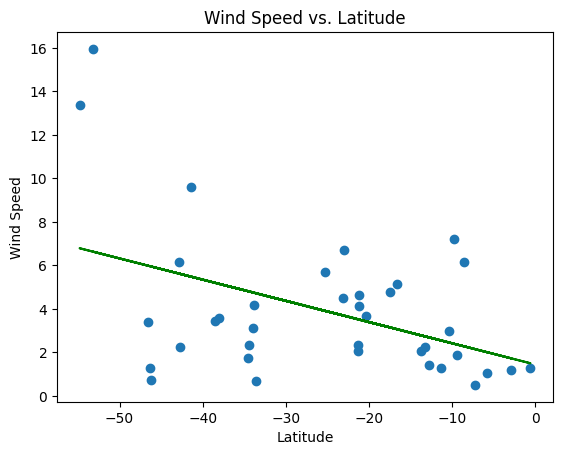

In [181]:
# Southern Hemisphere
# YOUR CODE HERE
linearRegressionPlot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', 'Wind Speed vs. Latitude')

**Discussion about the linear relationship:** YOUR RESPONSE HERE